### Reularized Regression - For Variable Selection

##### The regularized Linear Regression techniques for feature selection as well as avoiding overfit in linear regression. 
- Lasso
- Ridge 
- ElasticNet 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression

In [3]:
# Create a synthetic data using make_regression
X,y = make_regression(n_features=4, n_samples=20, noise=1)

In [4]:
X_new = pd.DataFrame(X)
X_new.head()

,0,1,2,3
0,0.844260,-0.466985,-2.913588,-2.059470
1,0.996648,0.444677,-0.226364,0.744475
2,2.702947,0.043554,1.037890,-0.148727
3,-0.414034,-0.053779,0.137005,-1.461958
4,-0.194662,0.139966,-0.251178,-2.368712


In [5]:
# creating 4 random variables 
randomVar_1 = np.random.uniform(low=-1, high=1, size=20)
randomVar_2 = np.random.uniform(low=-1, high=1, size=20)
randomVar_3 = np.random.uniform(low=-1, high=1, size=20)
randomVar_4 = np.random.uniform(low=-1, high=1, size=20)

In [6]:
print(randomVar_1)

[-0.97206622 -0.44969593  0.12411009 -0.58484078  0.90420241 -0.31351863
  0.18458327  0.61764591  0.15017804 -0.28003657  0.88992642 -0.53860844
 -0.59314101 -0.11219711  0.35537655 -0.18089293  0.91231146 -0.99898508
  0.81769293  0.34874843]


In [7]:
# append them to the independent variables list 
X_new["rv1"] = randomVar_1
X_new["rv2"] = randomVar_2
X_new["rv3"] = randomVar_3
X_new["rv4"] = randomVar_4

In [8]:
X_new.head()

,0,1,2,3,rv1,rv2,rv3,rv4
0,0.844260,-0.466985,-2.913588,-2.059470,-0.972066,-0.126143,0.893637,0.504738
1,0.996648,0.444677,-0.226364,0.744475,-0.449696,-0.976967,0.013427,-0.695154
2,2.702947,0.043554,1.037890,-0.148727,0.124110,0.651246,-0.283096,0.520687
3,-0.414034,-0.053779,0.137005,-1.461958,-0.584841,-0.138905,-0.899484,0.066274
4,-0.194662,0.139966,-0.251178,-2.368712,0.904202,-0.637717,-0.429118,0.165873


<AxesSubplot:>

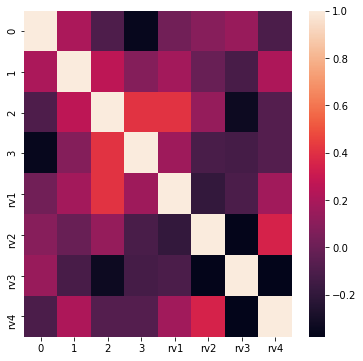

In [9]:
import seaborn as sn; 

# Compute the correlation matrix
corr = X_new.corr()

# Set up the matplotlib figure
plt.subplots(figsize=(6, 6))

# Draw the heatmap
sn.heatmap(corr) 

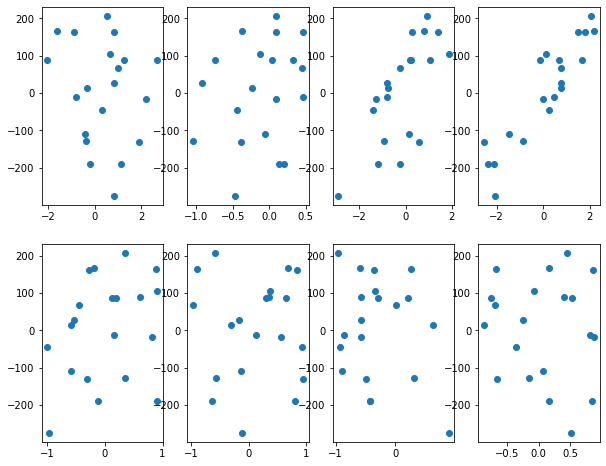

In [10]:
# check the scatterplot for any relationship 
fig = plt.figure(1, figsize=(10,8))
columns = 4
rows = 2

for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.scatter(X_new.iloc[:,i-1], y)

plt.show()

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [17]:
#Creating the model objects:

lr_model = LinearRegression()
ls_model = Lasso(alpha = 1.0)
ri_model = Ridge(alpha = 1.0)
en_model = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [18]:
#Fitting the models

lr_model.fit(X_new,y)
ls_model.fit(X_new,y)
ri_model.fit(X_new,y)
en_model.fit(X_new,y)

ElasticNet()

In [27]:
#Creating a dataframe to compare the model outputs
data = {'Linear' : lr_model.coef_, 
         
        'Ridge' :ri_model.coef_,
        'Lasso': ls_model.coef_,
    'ElasticNet':en_model.coef_ }

df_model_comparision =pd.DataFrame(data) 
df_model_comparision

,Linear,Ridge,Lasso,ElasticNet
0,18.890402,17.290153,18.355924,8.560208
1,10.268767,9.966905,5.395860,6.303044
2,45.170444,43.523582,45.220183,35.930858
3,74.702067,72.872615,74.232176,60.061275
4,0.153374,2.218097,0.000000,5.281974
5,0.154786,0.823539,0.000000,0.030816
6,-0.555807,-1.666839,-0.000000,-2.619190
7,-0.530262,-2.093957,0.000000,-2.529647


In [29]:
#Thus we can see that ElasticNet affects some variables disproportionately. 
#Hence we will try changing the HyperParameter values


ri_model = Ridge(alpha=0.1)
en_model = ElasticNet(alpha=0.1, l1_ratio=0.8)

ri_model.fit(X_new, y)
en_model.fit(X_new, y)


ElasticNet(alpha=0.1, l1_ratio=0.8)

In [31]:
#Creating a second dataframe to compare the models :

data_2 = {'Linear' : lr_model.coef_,         
        'Ridge' :ri_model.coef_,
        'Lasso': ls_model.coef_,
    'ElasticNet':en_model.coef_ }

df_model_comparision_2 =pd.DataFrame(data_2) 
df_model_comparision_2

,Linear,Ridge,Lasso,ElasticNet
0,18.890402,18.714044,18.355924,18.241003
1,10.268767,10.264476,5.395860,9.633140
2,45.170444,44.970230,45.220183,44.677239
3,74.702067,74.514401,74.232176,73.915411
4,0.153374,0.428380,0.000000,0.670265
5,0.154786,0.265176,0.000000,0.048209
6,-0.555807,-0.708976,-0.000000,-0.688165
7,-0.530262,-0.762922,0.000000,-0.611682


In [32]:
#Thus we can see that the ElasticNet perfo

In [37]:
#The best alpha value can be figured out from a new module ElasticNetCV

from sklearn.linear_model import ElasticNetCV

enCV_model = ElasticNetCV(cv=5, random_state=0)
enCV_model.fit(X_new, y)

print("Best Alpha:", enCV_model.alpha_ )
print("Best L1 Ratio:", enCV_model.l1_ratio_)
print("Model Coefficients:", enCV_model.coef_)

Best Alpha: 0.36094345886712886
Best L1 Ratio: 0.5
Model Coefficients: [13.97095831  8.28609263 40.85486143 68.49049623  4.07414886  0.58058813
 -2.30265823 -2.5914473 ]


In [39]:

en_model = ElasticNet(alpha = enCV_model.alpha_, l1_ratio = enCV_model.l1_ratio_)
en_model.fit(X_new, y)

#Creating a third dataframe to compare the models :

data_3 = {'Linear' : lr_model.coef_,         
        'Ridge' :ri_model.coef_,
        'Lasso': ls_model.coef_,
    'ElasticNet':en_model.coef_ }

df_model_comparision_3 =pd.DataFrame(data_3) 
df_model_comparision_3

,Linear,Ridge,Lasso,ElasticNet
0,18.890402,18.714044,18.355924,13.970958
1,10.268767,10.264476,5.395860,8.286093
2,45.170444,44.970230,45.220183,40.854861
3,74.702067,74.514401,74.232176,68.490496
4,0.153374,0.428380,0.000000,4.074149
5,0.154786,0.265176,0.000000,0.580588
6,-0.555807,-0.708976,-0.000000,-2.302658
7,-0.530262,-0.762922,0.000000,-2.591447


In [40]:
# A Demonstration of how an increasing alpha leads to the reduction of coefficients, eventually to zero. 

la_model = Lasso(alpha=1000)   #100, 1000 , 10,000
la_model.fit(X_new, y)

print("Model Coefficients:", la_model.coef_)

Model Coefficients: [-0.  0.  0.  0.  0. -0. -0. -0.]
